# Plot energy in water layer

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

In [3]:
sW = pd.read_csv("/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o5_180s_west/HFFZ_fu-energy.csv")
sM = pd.read_csv("/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o5_180s_middle/HFFZ_-energy.csv")
sE = pd.read_csv("/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o5_180s_east/HFFZ_full-energy.csv")

In [34]:
def calculate_M0_Mw(df):
    M0 = df['seismic_moment'][len(df)-1]
    Mw = 2/3 * (np.log10(M0) - 9.1)
    print("M0 = {} and Mw = {}.".format(M0, Mw))
    return M0, Mw

In [10]:
calculate_M0_Mw(sW)
calculate_M0_Mw(sM)
calculate_M0_Mw(sE)

M0 = 1.32542e+20 and Mw = 7.34823567974377.
M0 = 1.29198e+20 and Mw = 7.3408371938548225.
M0 = 1.31871e+20 and Mw = 7.34676619968586.


In [13]:
sW

,time,gravitational_energy,acoustic_energy,acoustic_kinetic_energy,elastic_energy,elastic_kinetic_energy,total_frictional_work,static_frictional_work,seismic_moment,plastic_moment
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1,9.024330e-69,1.413920e-54,1.484740e-54,1.468380e+11,5.371540e+10,2.169030e+11,1.409580e+11,7.390380e+14,-4.748890e+11
2,0.2,1.527450e-49,3.849240e-38,4.239700e-38,1.147000e+12,4.135810e+11,1.626720e+12,1.124390e+12,5.312520e+15,-1.190340e+10
3,0.3,9.340210e-41,3.410880e-30,3.810220e-30,3.735990e+12,1.302880e+12,5.187180e+12,3.707210e+12,1.734240e+16,1.193480e+13
4,0.4,5.839070e-34,4.088810e-24,4.454940e-24,8.451140e+12,2.826860e+12,1.153540e+13,8.421710e+12,3.889150e+16,4.310140e+13
...,...,...,...,...,...,...,...,...,...,...
1796,179.6,6.136800e+10,2.372720e+08,7.239950e+10,2.945110e+16,5.297010e+12,4.089320e+16,2.802940e+16,1.325420e+20,4.308590e+18
1797,179.7,6.138990e+10,2.392410e+08,7.226770e+10,2.945110e+16,5.269700e+12,4.089320e+16,2.802980e+16,1.325420e+20,4.308590e+18
1798,179.8,6.141600e+10,2.377100e+08,7.218140e+10,2.945100e+16,5.237890e+12,4.089320e+16,2.803040e+16,1.325420e+20,4.308590e+18
1799,179.9,6.144580e+10,2.323720e+08,7.214430e+10,2.945100e+16,5.202540e+12,4.089320e+16,2.803090e+16,1.325420e+20,4.308590e+18


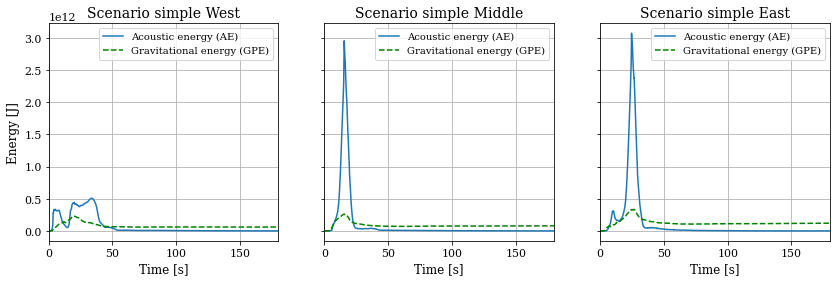

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figwidth(14)
#fig.suptitle('Energy in the water layer (= acoustic medium)', fontsize=14, y=1.02)
ax1.set_xlim(sW['time'].iloc[0], sW['time'].iloc[-1],)
ax1.plot(sW['time'],sW['acoustic_energy'], label='Acoustic energy (AE)')
ax1.plot(sW['time'],sW['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax1.plot(sW['time'],sW['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax1.grid()
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Energy [J]', fontsize=12)
ax1.set_title('Scenario simple West', fontsize=14)
ax1.legend()

ax2.plot(sM['time'],sM['acoustic_energy'], label='Acoustic energy (AE)')
ax2.plot(sM['time'],sM['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax2.plot(sM['time'],sM['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax2.grid()
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_title('Scenario simple Middle', fontsize=14)
ax2.legend()

ax3.plot(sE['time'],sE['acoustic_energy'], label='Acoustic energy (AE)')
ax3.plot(sE['time'],sE['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax3.plot(sE['time'],sE['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax3.grid()
ax3.set_xlabel('Time [s]', fontsize=12)
ax3.set_title('Scenario simple East', fontsize=14)
ax3.legend()

plt.savefig('output/Energy_waterlayer_AE_GPE.png', dpi=300)
#plt.savefig('output/Energy_waterlayer_all.png', dpi=300)

## [Bolshakova and Nosov (2011)](https://link.springer.com/article/10.1007/s00024-013-0730-6)

In [48]:
def theoretical_energies(df):
    M0 = df['seismic_moment'][len(df)-1]
    Mw = 2/3 * (np.log10(M0) - 9.1)
    E_TS_theoretical_max = 10 ** (2.0 * Mw - 1.7)
    E_EQ = 10 ** (1.5 * Mw + 4.5)
    print("E_TS_theoretical_max = {:.2} and E_EQ = {:.2}.".format(E_TS_theoretical_max, E_EQ))
    # potential energy of initial elevation (tsunami energy) as a function of earthquake moment magnitude
    E_TS = 10 ** (2.33 * Mw - 5.59)
    print("E_TS = {:.2}".format(E_TS))
    print("--------------------------------")

In [49]:
theoretical_energies(sW)
theoretical_energies(sM)
theoretical_energies(sE)

E_TS_theoretical_max = 9.9e+12 and E_EQ = 3.3e+15.
E_TS = 3.4e+11
--------------------------------
E_TS_theoretical_max = 9.6e+12 and E_EQ = 3.2e+15.
E_TS = 3.3e+11
--------------------------------
E_TS_theoretical_max = 9.9e+12 and E_EQ = 3.3e+15.
E_TS = 3.4e+11
--------------------------------


In [50]:
def tsunami_pot_energy(df):
    # max Gravitational energy (energy output)
    GPE = df['gravitational_energy']
    GPE_TS_max = max(GPE)
    print("GPE_TS_max = {:.2}".format(GPE_TS_max))

In [51]:
tsunami_pot_energy(sW)
tsunami_pot_energy(sM)
tsunami_pot_energy(sE)

GPE_TS_max = 2.3e+11
GPE_TS_max = 2.6e+11
GPE_TS_max = 3.3e+11


### Plot with tsunami potential energy

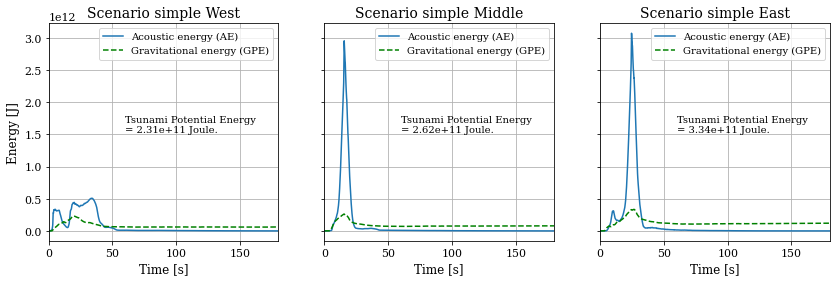

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_figwidth(14)
#fig.suptitle('Energy in the water layer (= acoustic medium)', fontsize=14, y=1.02)
ax1.set_xlim(sW['time'].iloc[0], sW['time'].iloc[-1],)
ax1.plot(sW['time'],sW['acoustic_energy'], label='Acoustic energy (AE)')
ax1.plot(sW['time'],sW['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax1.plot(sW['time'],sW['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax1.grid()
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Energy [J]', fontsize=12)
ax1.set_title('Scenario simple West', fontsize=14)
ax1.text(x=max(sE['time'])/3, y=max(sE['acoustic_energy'])/2, 
         s="Tsunami Potential Energy \n= {:.2e} Joule.".format(max(sW['gravitational_energy'])), rotation=0)
ax1.legend()

ax2.plot(sM['time'],sM['acoustic_energy'], label='Acoustic energy (AE)')
ax2.plot(sM['time'],sM['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax2.plot(sM['time'],sM['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax2.grid()
ax2.set_xlabel('Time [s]', fontsize=12)
ax2.set_title('Scenario simple Middle', fontsize=14)
ax2.text(x=max(sE['time'])/3, y=max(sE['acoustic_energy'])/2, 
         s="Tsunami Potential Energy \n= {:.2e} Joule.".format(max(sM['gravitational_energy'])), rotation=0)
ax2.legend()

ax3.plot(sE['time'],sE['acoustic_energy'], label='Acoustic energy (AE)')
ax3.plot(sE['time'],sE['gravitational_energy'], label='Gravitational energy (GPE)', linestyle='--', color='green')
#ax3.plot(sE['time'],sE['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
ax3.grid()
ax3.set_xlabel('Time [s]', fontsize=12)
ax3.set_title('Scenario simple East', fontsize=14)
ax3.text(x=max(sE['time'])/3, y=max(sE['acoustic_energy'])/2, 
         s="Tsunami Potential Energy \n= {:.2e} Joule.".format(max(sE['gravitational_energy'])), rotation=0)
ax3.legend()

plt.savefig('output/Energy_waterlayer_tsunami-pot-energy.png', dpi=300)